In [53]:
import gzip
import os
import numpy as np
current_dir = os.getcwd()
f = gzip.open(current_dir+'/data/fashion/train-images-idx3-ubyte.gz','r')

image_size = 28
num_images = 60000

#train
f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
x_train = data.reshape(num_images, image_size, image_size, 1)

f = gzip.open(current_dir+'/data/fashion/train-labels-idx1-ubyte.gz','r')
f.read(8)
buf = f.read(num_images)
y_train = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)

#test
f = gzip.open(current_dir+'/data/fashion/t10k-images-idx3-ubyte.gz','r')
num_images = 10000

f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
x_test = data.reshape(num_images, image_size, image_size, 1)

f = gzip.open(current_dir+'/data/fashion/t10k-labels-idx1-ubyte.gz','r')
f.read(8)
buf = f.read(num_images)
y_test = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)

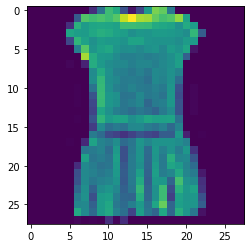

In [54]:
import matplotlib.pyplot as plt
image = np.asarray(x_train[3]).squeeze()#to remove last dimention
plt.imshow(image)
plt.show()

In [55]:
print("x_train.shape:",x_train.shape)

x_train.shape: (60000, 28, 28, 1)


In [59]:
set(y_train)

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0}

## build model using functional api

In [56]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Conv2D,Flatten,Dropout,Dense
from tensorflow.keras.models import Model

In [57]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32,(3,3), strides=2, activation='relu')(i)
x = Conv2D(64,(3,3), strides=2, activation='relu')(x)
x = Conv2D(128,(3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10, activation='softmax')(x)
model = Model(i,x)

In [58]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

hist = model.fit(x_train,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5799 - accuracy: 0.7985
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4118 - accuracy: 0.8455
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3701 - accuracy: 0.8620
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3425 - accuracy: 0.8727
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3308 - accuracy: 0.8762
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3083 - accuracy: 0.8830
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2992 - accuracy: 0.8862
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2925 - accuracy: 0.8894
Epoch 9/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2811 - accuracy: 0.8939
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.278

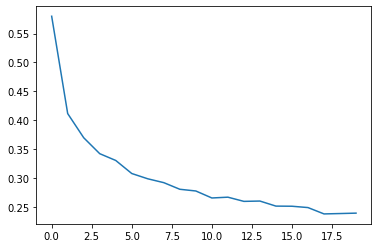

In [60]:
from matplotlib import pyplot as plt
plt.plot(hist.history['loss'],label='loss')

     |████████████████████████████████| 6.8 MB 67 kB/s eta 0:00:015
     |████████████████████████████████| 301 kB 60 kB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
confusion matrix without normalization
[[788   3  25  38   6   1 133   0   6   0]
 [  4 965   0  21   1   0   8   0   1   0]
 [ 13   1 796   9  72   0 106   0   3   0]
 [ 12   6   9 882  61   0  27   0   3   0]
 [  1   2  80  17 807   0  90   0   3   0]
 [  0   0   0   1   0 963   0  31   1   4]
 [118   1  57  36  98   0 672   0  18   0]
 [  0   0   0   0   0   9   0 960   0  31]
 [  2   1   1   4   4   3   6   4 975   0]
 [  1   0   0   0   0   8   0  38   0 953]]


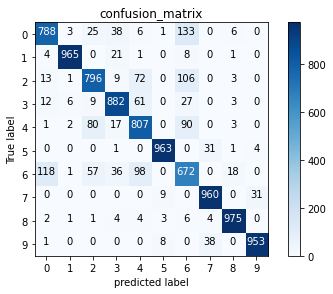

In [61]:
!pip install scikit-learn
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False,title="confusion_matrix",cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("normalized confusion matrix")
    else:
        print("confusion matrix without normalization")
        
    print(cm)
    plt.imshow(cm, interpolation = 'nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    threshold = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                 horizontalalignment= "center",
                 color="white" if cm[i,j]> threshold else "black"
                )
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('predicted label')
    plt.show()
        
p_test = model. predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm, list(range(10)))